In [1]:
#coding=utf-8
import pandas as pd

import jieba

df = pd.read_csv("whisper.csv", encoding="utf-8")

df['content'] = df['content'].astype(str)

df.head()

,id,content,publishTime
0,1,即将离开华园的我-我想向你表白\n2016年5月的时候，偶然的一个机会。让我知道了灯神。然后...,2016-11-10 10:29:31
1,2,吴泽旋我爱你,2016-11-10 11:48:27
2,4,我是大一新生，然后就是……我喜欢上我们部长了……他是软院的，人很好，人超级好，可能比较宅那种...,2016-11-10 13:44:22
3,5,从暑假认识你，到我们分隔两地之后，几千公里的距离没有减少你给我的安全感。今年最大的惊喜，就是...,2016-11-10 13:45:05
4,6,我，大一的广东的。从小是在珠三角这边长大的，习惯了大城市的生活，对于很多东西都已经见怪不怪了...,2016-11-10 13:45:06


In [2]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [3]:
df.shape

(4881, 3)

In [4]:
text = df['content'][0]
cutted = chinese_word_cut(text)
cutted


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lhl\AppData\Local\Temp\jieba.cache
Loading model cost 0.778 seconds.
Prefix dict has been built succesfully.


'即将 离开 华园 的 我 - 我 想 向 你 表白 \n 2016 年 5 月 的 时候 ， 偶然 的 一个 机会 。 让 我 知道 了 灯神 。 然后 更 幸运 的 是 有 机会 更 深入 了解 灯神 。 从此 一入 红尘 ， 深似海 。 \n 每天 睡前 或者 早上 都 会 定时 打开 灯灯 ， 看看 每 一个 心愿 ， 看看 每 一个 悄悄话 。 都 会 感觉 顿时 自己 很 温暖 ， 感觉 我 和 所有 的 华工 同学 离 的 如此 近 。 以致于 可以 触碰 的 到 。 \n 我 想 向 灯灯 表白 。 灯神 ， 我 ❤ ️ 你 。 相信 你 的 未来 一定 能 承担 起 更 大 的 责任 。 \n 最后 还 想 问 一句 ， 还有 机会 加入 灯灯 么 。'

In [5]:
# 对句子进行分词  
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  
def seg_sentence(sentence):  
    sentence_seged = jieba.cut(sentence.strip())  
    stopwords = stopwordslist('chinese_stop_words.txt')  # 这里加载停用词的路径  
    outstr = ''  
    for word in sentence_seged:  
        if word not in stopwords:  
            if word != '\t' or '\n':  
                outstr += word  
                outstr += " "  
    return outstr  

In [6]:
for word in jieba.cut(text):
    print(word)

即将
离开
华园
的
我
-
我
想
向
你
表白


2016
年
5
月
的
时候
，
偶然
的
一个
机会
。
让
我
知道
了
灯神
。
然后
更
幸运
的
是
有
机会
更
深入
了解
灯神
。
从此
一入
红尘
，
深似海
。


每天
睡前
或者
早上
都
会
定时
打开
灯灯
，
看看
每
一个
心愿
，
看看
每
一个
悄悄话
。
都
会
感觉
顿时
自己
很
温暖
，
感觉
我
和
所有
的
华工
同学
离
的
如此
近
。
以致于
可以
触碰
的
到
。


我
想
向
灯灯
表白
。
灯神
，
我
❤
️
你
。
相信
你
的
未来
一定
能
承担
起
更
大
的
责任
。


最后
还
想
问
一句
，
还有
机会
加入
灯灯
么
。


In [7]:
seg_sentence(text)

'离开 华园 想 表白 \n 年 月 偶然 机会 灯神 幸运 机会 灯神 一入 红尘 深似海 \n 睡前 定时 打开 灯灯 心愿 悄悄话 感觉 温暖 感觉 华工 同学 以致于 触碰 \n 想 灯灯 表白 灯神 ❤ ️ 未来 承担 责任 \n 想 问 机会 灯灯 '

In [8]:
# 王老师的教程！！！

In [9]:
df["content_cutted"] = df.content.apply(seg_sentence)

In [10]:
df.content_cutted.head()

0    离开 华园 想 表白 \n 年 月 偶然 机会 灯神 幸运 机会 灯神 一入 红尘 深似海 ...
1                                             吴泽旋 我爱你 
2    新生 喜欢 部长 软院 超级 宅 该不该 告白 感觉 好看 很会 撩 自卑 开朗 告白 拒 ...
3    暑假 分隔 两地 几千公里 距离 减少 安全感 惊喜 小心翼翼 喜欢 发现 喜欢 享受 有聊...
4    大一 广东 珠三角 长大 习惯 大城市 生活 见怪不怪 来到 大一 外省 舍友 不整洁 生活...
Name: content_cutted, dtype: object

In [11]:
topic1 = '''
喜欢
分手 分手 分手 分手 分手
朋友 希望 感觉 
忘记 忘记 忘记 忘记
异地 异地 异地 异地 异地 
回忆 回忆 回忆 回忆
见面 见面 见面 见面 见面 
感情 一年
生日 生日
再见 再见
开心 生日快乐
甘心
心愿
送给
备胎
恋人
复合
我爱你
心底
时间 聊天 事情 发现 微信 机会 故事 忘记 告诉 想起 记得 
放下 放下 放下 ta ta ta ta ta 
表白 生日 灯神 分开 再也 难过 生活 那天 主动 
离开 朋友圈 慢慢 回忆 放下 爱情 一个月 这是 结束 结束 结束 结束 
见到 遇见 两年 后悔 当初 害怕 伤心 纠结 对不起 礼物 好友 再见 悄悄话 晚上 终于 
初恋 打扰 暗恋 暗恋 暗恋 暗恋 答应 距离 半年 日子 三年 
拒绝 拒绝 拒绝 谢谢 高中 毕业 好好 理由 祝福 找到 样子 想着 幸福 小灯 分享 消息 
前任 前任 前任 心情 世界 联系方式 我要 感谢 大学 熟悉 我该 信息 忍不住 交集 学校 想念 安慰 关系 难受 遗憾 明白 女朋友 三个 回来
'''

In [12]:
topic2 = '''
感觉 生活 生活
希望 希望 希望 朋友 朋友 恋爱
感情 事情 爱情 努力 害怕 世界 
人生 人生 人生 人生 人生
时间 时间 时间
情侣 情侣 情侣
结婚 结婚 结婚 结婚
孤单 孤单 孤单 孤单 
心动 心动 心动 
快乐 快乐 快乐 快乐 快乐 
经历 经历 经历 大学 
孤独 孤独 孤独 孤独 孤独 
好好 改变 幸福 美好 结婚 开心 谈恋爱 选择 
现实 现实 现实 
痛苦 痛苦 告诉 分享 情侣 内心 发现 
难过 难过 难过 
感受 优秀 一段 永远 理解 
单身 单身 单身 
情绪 伤害 更好 想法 适合 孤单 学习 
长大 感到 担心 温暖 温暖 温暖 
发生 陪伴 父母 
寂寞 寂寞 寂寞 
失望 羡慕 心理 
一生 一生 一生 
悲伤 悲伤

想想 想着 习惯 找到 时光 悲伤 青春 一段时间 
讨厌 讨厌 讨厌
基佬 基佬
抑郁症
无助
倾诉 倾诉 难受 日子 伤心 遇见 接受 成熟 压力 无奈 慢慢 
状态 渴望 渴望 渴望 阳光 成长 关心 样子 关系 期待 照顾 一辈子 迷茫 面对 付出 脆弱 情感 学会 追求 面前 自私 吵架 谈过
'''

In [13]:
topic3 = '''
喜欢 喜欢
女生 女生 女生 女生 女生
男生 男生 男生 男生 男生
异性
女孩子 女孩子 女孩子
男孩子 男孩子 男孩子
好感 好感
身高 身高 身高
看法 看法 身高
感觉 朋友 男朋友 男朋友 男朋友 女朋友 女朋友 女朋友 
聊天 主动 异性 异性 异性 拒绝 关系 男票 女孩子 
表白 表白 发现 妹子 脱单 单身 
恋爱 恋爱 恋爱 好感 好感 好感 尴尬 尴尬 尴尬 
开心 谈恋爱 话题 性格 女票 相处 说话 微信 
好看 妈妈 想法 接触 男孩子 我爸 样子 原因 我妈 女孩 问问 漂亮 事情 身高 
接受 暧昧 生气 可爱 电影 回复 没什么 闺蜜 看法 吃饭 不错 灯神 类型 高中 态度 初中 优秀 
表现 朋友圈 算是 出去玩 找我聊 情况 奇怪 gay gay gay gay 舒服 哥哥 随便 照片 好多 发现自己 无聊 告诉 冷漠 自卑 自卑 自卑 
反感 反感 反感 好奇 对象 沟通 很想 老爸 长相 
搭讪 搭讪 搭讪 搭讪 内心 几次 聊得 厉害 三观 工科 从来不 哥们 交流 打扮 肯定 同意 接近
'''

In [14]:
topic4 = '''
华工 华工 华工 华工 华工 
工作 工作 工作 工作 工作 
外卖 外卖
饭堂 饭堂 饭堂
家里 家里 家里 家里 
专业 专业 专业
爸妈 爸妈 爸妈
建议 建议 建议 
实习 实习 实习
活动 活动 活动
学校 同学 毕业 毕业 毕业 学习 学习 学习 
感觉 家里 希望 回家 成绩 成绩 成绩 成绩 成绩 考研 考研 考研 考研 
学生 父母 生活 悄悄话 孩子 专业 爸妈 老师 高中 广州 灯神 打电话 考试 谢谢 爸爸 大三 建议 时间 实习 活动 大四 找到 学期 开学 努力 参加 师兄 微信 事情 暑假 复习 大二 原因 读书 教室 一年 小姐姐 情况 告诉 高考 交流 压力 没什么 游戏 发现 读研 大一 哥哥 家庭 家人 研究生 能力 学院 回去 社会 上课 评论 饭堂 小伙伴 放假 肯定 外卖 昨晚 推荐 不错 面试 关注 确实 两年 我要 选择 电话 紧张 城市 社团 理解 在家 神灯 组织 公司 打算 兼职 发生 本科 父亲 影响 高三
'''

In [15]:
topic5 = '''
宿舍 宿舍 宿舍 宿舍 宿舍 
舍友 舍友 舍友 舍友 
晚上 晚上 晚上 
阿姨 阿姨 阿姨 阿姨
图书馆 图书馆 图书馆 图书馆 
声音 声音 声音 手机
大声 大声 大声
位置 位置 位置
睡觉 睡觉 睡觉 睡觉 
希望 同学 学习 室友 吃饭 事情 感觉 阿姨 回来 旁边 时间 天天 衣服 大声 位置 电脑 听到 发现 小时 提醒 可爱 睡不着 恶心 明明 想想 超级 麻烦 今晚 视频 小伙伴 舒服 控制 不知 这件 不好意思 南校 打游戏 司机 灯神 安静 北校 穿着 样子 说话 博学 妹子 路过 瞬间 唱歌 睡着 办法 好看 那位 受不了 想着 跑步 对面 北区 我要 你好 上课 空调 休息 熬夜 自习 关系 尴尬 三个 作业 好好 心疼 记得 头发 座位 音乐 告诉 昨天 出门 习惯 整天 小心 找个 厕所 拜托 情况 放在 一会 外面 工作人员 游泳 一件 终于 四年
'''

In [16]:
topic_all = '''
华工 工作 大学 学校 同学 毕业 学习 家里 回家 成绩 考研 学生 父母 生活 悄悄话 孩子 专业 爸妈 老师 高中 广州 打电话 考试 谢谢 爸爸 大三 建议 时间 实习 活动 大四 找到 学期 开学 努力 参加 师兄 微信 事情 暑假 复习 大二 原因 读书 教室 一年 小姐姐 情况 告诉 高考 交流 压力 没什么 游戏 发现 读研 大一 哥哥 家庭 家人 研究生 能力 学院 回去 社会 上课 评论 饭堂 小伙伴 放假 肯定 外卖 昨晚 推荐 不错 面试 关注 确实 两年 我要 选择 电话 紧张 城市 社团 理解 在家 神灯 组织 公司 打算 兼职 发生 本科 父亲 影响 高三

宿舍 舍友 晚上 图书馆 声音 手机 睡觉 同学 学习 室友 吃饭感觉 阿姨 回来 旁边 时间 天天 衣服 大声 位置 电脑 听到 小时 提醒 可爱 睡不着 恶心 明明 想想 超级 麻烦 今晚 视频 小伙伴 舒服 控制 不知 这件 不好意思 南校 打游戏 司机 安静 北校 穿着 说话 博学 妹子 路过 瞬间 唱歌 睡着 办法 好看 那位 受不了 想着 跑步 对面 北区 我要 你好 上课 空调 休息 熬夜 自习 关系 尴尬 三个 作业 好好 心疼 记得 头发 座位 音乐 昨天 出门 习惯 整天 小心 找个 厕所 拜托 情况 放在 一会 外面 工作人员 游泳 一件 终于 四年

感觉 生活 希望 朋友 恋爱 未来 感情 爱情 努力 害怕 世界 人生 时间 经历 快乐 大学 孤独 好好 改变 幸福 美好 结婚 开心 谈恋爱 选择 现实 痛苦 告诉 分享 情侣 内心 发现 难过 感受 优秀 一段 永远 理解 单身 情绪 伤害 更好 想法 适合 孤单 学习 心动 长大 感到 担心 温暖 发生 陪伴 父母 寂寞 失望 羡慕 心理 一生 想想 想着 习惯 时光 悲伤 青春 一段时间 讨厌 倾诉 难受 日子 伤心 遇见 接受 成熟 压力 无奈 慢慢 状态 渴望 阳光 成长 关心 样子 关系 期待 照顾 一辈子 迷茫 面对 付出 脆弱 情感 学会 追求 面前 自私 吵架 谈过

喜欢 分手 朋友 希望 异地 感情 一年 开心 时间 见面 聊天 发现 微信 机会 故事 忘记 想起 记得 放弃 ta 表白 生日 分开 再也 难过 那天 主动 离开 朋友圈 慢慢 回忆 放下 爱情 一个月 这是 结束 见到 遇见 两年 后悔 当初 害怕 伤心 纠结 对不起 礼物 好友 再见 悄悄话 晚上 终于 初恋 打扰 暗恋 答应 距离 半年 日子 三年 拒绝 谢谢 毕业 好好 理由 祝福 样子 想着 幸福 小灯 分享 消息 前任 心情 世界 联系方式 我要 感谢 大学 熟悉 我该 信息 忍不住 交集 学校 想念 安慰 难受 遗憾 明白 女朋友 三个 回来

喜欢 女生 男生 朋友 男朋友 女朋友 聊天 主动 异性 拒绝 关系 男票 女孩子 表白 妹子 脱单 单身 恋爱 好感 尴尬 开心 谈恋爱 话题 性格 女票 相处 说话 微信 好看 妈妈 想法 接触 男孩子 我爸 原因 我妈 女孩 问问 漂亮 身高 接受 暧昧 生气 可爱 电影 回复 没什么 闺蜜 看法 吃饭 不错 灯神 类型 态度 初中 优秀 表现 朋友圈 算是 出去玩 找我聊 奇怪 gay 舒服 哥哥 随便 照片 好多 发现自己 无聊 冷漠 自卑 反感 好奇 对象 沟通 很想 老爸 长相 搭讪 内心 几次 聊得 厉害 三观 工科 从来不 哥们 交流 打扮 肯定 同意 接近
喜欢 喜欢 喜欢 喜欢 
分手 分手 分手
女生 女生 女生
男生 男生 男生
朋友 朋友
大学
毕业 毕业
恋爱 恋爱

生活
华工 华工 
生活
异地 异地
舍友
主动
恋爱
学习
考研

宿舍 宿舍
睡觉 睡觉
'''

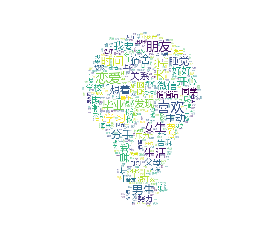

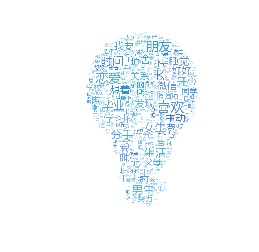

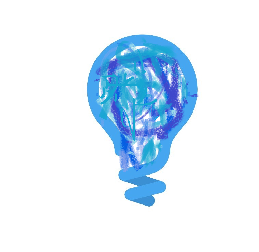

In [17]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy.misc import imread
import matplotlib.pyplot as plt
#wordcloud = WordCloud().generate(text)
mask = imread("genie_colored.png")

wc = WordCloud(background_color="white", #背景颜色max_words=30,# 词云显示的最大词数
mask=mask,#设置背景图片
max_words=2000,
max_font_size=40, #字体最大值
               min_font_size=5,
random_state=45,
font_path="yahei.ttf")

wc.generate(topic_all)

image_colors = ImageColorGenerator(mask)

# 给定模版，随即颜色
plt.imshow(wc)
plt.axis("off")

#可保存随机颜色
#fig = plt.gcf()
#fig.set_size_inches(15, 15)
#fig.savefig('topic_all_genie_colored_yahei.png', dpi=600)

# 给定模版，取模版颜色，绘制词云
plt.figure()
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")



# 绘制背景图片为颜色的图片
plt.figure()
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()

# 保存图片
wc.to_file("topic_all_blue_yahei.png")

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [12]:
# 提取50个特征关键词
n_features = 1000

In [13]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5,
                                min_df = 10)
tf = tf_vectorizer.fit_transform(df.content_cutted)

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

In [15]:
# 划分N个大类
n_topics = 5
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=100,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [16]:
lda.fit(tf)

E:\UsefulTools\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [200]:
# 主题没有一个确定的名称，而是用一系列关键词刻画的。我们定义以下的函数，把每个主题里面的前若干个关键词显示出来：
def print_top_words(model, feature_names, n_top_words):
    wordslist = []
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        wordslist.append(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    return wordslist[0], wordslist[1:]

In [201]:
# 每个主题输出前30个关键词。
n_top_words = 30

In [202]:
tf_feature_names = tf_vectorizer.get_feature_names()
school_life_words, other_words = print_top_words(lda, tf_feature_names, n_top_words)

Topic #0:
华工 工作 大学 学校 同学 毕业 学习 感觉 家里 希望 回家 成绩 考研 学生 父母 生活 悄悄话 孩子 专业 爸妈 老师 高中 广州 灯神 打电话 考试 谢谢 爸爸 大三 建议
Topic #1:
宿舍 舍友 晚上 图书馆 声音 手机 睡觉 希望 同学 学习 室友 吃饭 事情 感觉 阿姨 回来 旁边 时间 天天 衣服 大声 位置 电脑 听到 发现 小时 提醒 可爱 睡不着 恶心
Topic #2:
感觉 生活 希望 朋友 恋爱 未来 感情 事情 爱情 努力 害怕 世界 人生 时间 经历 快乐 大学 孤独 好好 改变 幸福 美好 结婚 开心 谈恋爱 选择 现实 痛苦 告诉 分享
Topic #3:
喜欢 分手 朋友 希望 感觉 异地 感情 一年 开心 时间 见面 聊天 事情 发现 微信 机会 故事 忘记 告诉 想起 记得 放弃 ta 表白 生日 灯神 分开 再也 难过 生活
Topic #4:
喜欢 女生 男生 感觉 朋友 男朋友 女朋友 聊天 主动 异性 拒绝 关系 男票 女孩子 表白 发现 妹子 脱单 单身 恋爱 好感 尴尬 开心 谈恋爱 话题 性格 女票 相处 说话 微信



In [219]:
df.head()

,id,content,publishTime,content_cutted,correlation_schoollife
0,1,即将离开华园的我-我想向你表白\n2016年5月的时候，偶然的一个机会。让我知道了灯神。然后...,2016-11-10 10:29:31,离开 华园 想 表白 \n 年 月 偶然 机会 灯神 幸运 机会 灯神 一入 红尘 深似海 ...,-5.5
1,2,吴泽旋我爱你,2016-11-10 11:48:27,吴泽旋 我爱你,0.0
2,4,我是大一新生，然后就是……我喜欢上我们部长了……他是软院的，人很好，人超级好，可能比较宅那种...,2016-11-10 13:44:22,新生 喜欢 部长 软院 超级 宅 该不该 告白 感觉 好看 很会 撩 自卑 开朗 告白 拒 ...,-1.5
3,5,从暑假认识你，到我们分隔两地之后，几千公里的距离没有减少你给我的安全感。今年最大的惊喜，就是...,2016-11-10 13:45:05,暑假 分隔 两地 几千公里 距离 减少 安全感 惊喜 小心翼翼 喜欢 发现 喜欢 享受 有聊...,-5.5
4,6,我，大一的广东的。从小是在珠三角这边长大的，习惯了大城市的生活，对于很多东西都已经见怪不怪了...,2016-11-10 13:45:06,大一 广东 珠三角 长大 习惯 大城市 生活 见怪不怪 来到 大一 外省 舍友 不整洁 生活...,-2.0


In [204]:
def calculate_correlation(sentence):
    cor = 0
    for word in sentence.split(' '):
        if word in school_life_words.split(' ')[0:10]:
            cor = cor + 1
        elif word in school_life_words.split(' ')[10:20]:
            cor = cor + 0.5
        for i in range(4):
            if word in other_words[i].split(' '):
                cor = cor - 0.5
    return cor

In [205]:
df["correlation_schoollife"] = df.content_cutted.apply(calculate_correlation)

In [206]:
other_words

['宿舍 舍友 晚上 图书馆 声音 手机 睡觉 希望 同学 学习 室友 吃饭 事情 感觉 阿姨 回来 旁边 时间 天天 衣服 大声 位置 电脑 听到 发现 小时 提醒 可爱 睡不着 恶心',
 '感觉 生活 希望 朋友 恋爱 未来 感情 事情 爱情 努力 害怕 世界 人生 时间 经历 快乐 大学 孤独 好好 改变 幸福 美好 结婚 开心 谈恋爱 选择 现实 痛苦 告诉 分享',
 '喜欢 分手 朋友 希望 感觉 异地 感情 一年 开心 时间 见面 聊天 事情 发现 微信 机会 故事 忘记 告诉 想起 记得 放弃 ta 表白 生日 灯神 分开 再也 难过 生活',
 '喜欢 女生 男生 感觉 朋友 男朋友 女朋友 聊天 主动 异性 拒绝 关系 男票 女孩子 表白 发现 妹子 脱单 单身 恋爱 好感 尴尬 开心 谈恋爱 话题 性格 女票 相处 说话 微信']

In [218]:
df.sort_values(by='correlation_schoollife', ascending=False).head(200)

,id,content,publishTime,content_cutted,correlation_schoollife
3921,3882,昨晚老妈说 以后你毕业了来xx学校（我以前的中学）教书也不错啊 我说我不想在这边工作 老妈说...,2017-09-03 17:50:39,昨晚 老妈 说 毕业 xx 学校 中学 教书 不错 说 工作 老妈 说 工作...,11.5
3515,3467,这又是一个难忘的经历。\n坐车去工作地点的时候，跟老板娘聊天\n她问：“你哪所大学的？”\n...,2017-08-03 09:39:04,难忘 经历 \n 坐车去 工作 地点 老板娘 聊天 \n 问 大学 \n 风轻云 淡地 说 ...,8.5
1324,1284,我今天就是来实名质疑选修课政策的，这种扯淡的要求早就该取消了\n我不明白为什么学校要在选修课...,2017-03-16 23:16:55,实名 质疑 选修课 政策 扯淡 早就 取消 \n 明白 学校 选修课 设置 \n 修 核心 ...,8.5
2890,2842,我只想知道，不公平的体测成绩有什么意义？\n体测成绩出来了。有人惊喜发现自己成绩取了历次体测...,2017-06-17 00:31:15,想 公平 体测 成绩 意义 \n 体测 成绩 惊喜 发现自己 成绩 取 历次 体测 最高分 ...,8.5
4621,4582,最近在悄悄话多次看到吐槽自己丢东西的，不是伞就是外卖，我也想说几句。本人不是华工本校学生是外...,2017-10-19 20:44:08,悄悄话 吐槽 丢 伞 外卖 想 说 几句 华工 本校 学生 外校 交换 生 华工 学生 优秀...,6.5
1339,1296,作为一个大四准毕业狗，突然最近有点感慨，抒发一下\n 最近突然看到很多人在几十元卖讲...,2017-03-17 21:56:35,大四 准 毕业 狗 感慨 抒发 \n 几十元 卖 讲座 票 百元 卖通 选课 说...,5.5
1341,1298,从小家里就比较困难，高三的时候努力读书来到华工，已经大二了，心里非常希望快点毕业好出去工作，...,2017-03-17 23:14:18,家里 困难 高三 努力 读书 来到 华工 大二 希望 快点 毕业 工作 减轻 家里 负担 哥...,5.5
4485,4446,我想和你谈谈钱的事情\n灯神你好，我是一名大四的女生...\n我从大一开始每年开学就申请贫困...,2017-10-10 13:50:03,想 谈谈 钱 事情 \n 灯神 你好 大四 女生 \n 开学 申请 贫困 助学金 三等 奖学...,5.5
3670,3631,努力了好久终于摆脱高考收到华工化院的通知书了，然而，从被录取的那刻起，几乎所有见过的人包括我...,2017-08-16 22:10:13,努力 好久 终于 摆脱 高考 收到 华工 化院 通知书 录取 刻起 包括 父母 问 学了 应...,5.0
2862,2814,转眼又到毕业季，在华工呆了5个年头，去年的毕业似乎与我无关，忙碌是大四的关键词，却发现最后的...,2017-06-15 23:59:12,转眼 毕业 季 华工 呆 年头 去年 毕业 与我无关 忙碌 大四 关键词 发现 致谢 离不开...,5.0


In [211]:
df.to_csv("whisper_correlation.csv", encoding="utf_8_sig")

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)

E:\UsefulTools\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      25.095138        1       1 -0.099987 -0.032361
2      23.708298        1       2 -0.063497 -0.123128
4      19.855011        1       3 -0.223692  0.130342
0      19.379739        1       4  0.159027 -0.178888
1      11.961814        1       5  0.228151  0.204035, topic_info=     Category         Freq  Term        Total  loglift  logprob
term                                                           
247   Default  3070.000000    喜欢  3070.000000  30.0000  30.0000
316   Default  1145.000000    女生  1145.000000  29.0000  29.0000
749   Default  1121.000000    男生  1121.000000  28.0000  28.0000
371   Default   409.000000    宿舍   409.000000  27.0000  27.0000
181   Default   452.000000    华工   452.000000  26.0000  26.0000
152   Default   522.000000    分手   522.000000  25.0000  25.0000
748   Default   564.000000   男朋友   564.000000  24.0000  24.0000
868   Default   300.000000    舍友   300.000000  23.0000  23.0000
636   Default  1299.000000    朋友  1299.000000  22.0000  22.0000
397   Default   385.000000    工作   385.000000  21.0000  21.0000
622   Default   325.000000    晚上   325.000000  20.0000  20.0000
348   Default   383.000000    学校   383.000000  19.0000  19.0000
263   Default   207.000000   图书馆   207.000000  18.0000  18.0000
272   Default   183.000000    声音   183.000000  17.0000  17.0000
315   Default   403.000000   女朋友   403.000000  16.0000  16.0000
224   Default   425.000000    同学   425.000000  15.0000  15.0000
844   Default   468.000000    聊天   468.000000  14.0000  14.0000
290   Default   557.000000    大学   557.000000  13.0000  13.0000
68    Default   369.000000    主动   369.000000  12.0000  12.0000
664   Default   315.000000    毕业   315.000000  11.0000  11.0000
480   Default   401.000000    恋爱   401.000000  10.0000  10.0000
344   Default   415.000000    学习   415.000000   9.0000   9.0000
369   Default   204.000000    家里   204.000000   8.0000   8.0000
641   Default   279.000000    未来   279.000000   7.0000   7.0000
779   Default   140.000000    睡觉   140.000000   6.0000   6.0000
522   Default   180.000000    成绩   180.000000   5.0000   5.0000
429   Default   215.000000    异地   215.000000   4.0000   4.0000
737   Default   595.000000    生活   595.000000   3.0000   3.0000
535   Default   207.000000    手机   207.000000   2.0000   2.0000
840   Default   178.000000    考研   178.000000   1.0000   1.0000
...       ...          ...   ...          ...      ...      ...
149    Topic5    34.625601    出门    35.435588   2.1003  -5.7342
192    Topic5    34.210016    厕所    35.016392   2.1002  -5.7463
398    Topic5    33.031618  工作人员    33.840677   2.0993  -5.7813
693    Topic5    32.608780    游泳    33.413625   2.0991  -5.7942
336    Topic5    32.108404    妹纸    32.915038   2.0986  -5.8097
41     Topic5    32.046955    上床    32.852677   2.0986  -5.8116
884    Topic5    56.868119    视频    62.271122   2.0327  -5.2380
622    Topic5   242.384870    晚上   325.547404   1.8285  -3.7883
595    Topic5    85.527054    旁边   100.470236   1.9624  -4.8299
535    Topic5   140.993980    手机   207.246782   1.7383  -4.3301
874    Topic5    74.620119    衣服    96.944471   1.8617  -4.9664
173    Topic5    47.493947    北校    53.633190   2.0019  -5.4182
220    Topic5    49.949689    司机    60.454586   1.9326  -5.3678
296    Topic5    77.280661    天天   118.571154   1.6954  -4.9313
51     Topic5    52.819819  不好意思    66.226119   1.8973  -5.3119
221    Topic5   105.333216    吃饭   222.615797   1.3751  -4.6216
85     Topic5    57.132190    今晚    78.731046   1.8028  -5.2334
915    Topic5    59.121289    超级    84.550800   1.7657  -5.1992
997    Topic5    58.136943    麻烦    83.749060   1.7584  -5.2160
258    Topic5    87.703289    回来   198.151306   1.3084  -4.8048
224    Topic5   118.003493    同学   425.540699   0.8408  -4.5081
233    Topic5    67.352442    听到   121.601537   1.5326  -5.0688
344    Topic5   112.381395    学习   415.590458   0.8156  -4.

In [ ]:
data = pyLDAvis.sklearn.prepare(lda, tf, tf_vectorizer)
pyLDAvis.show(data)

E:\UsefulTools\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]



Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [18/Dec/2017 14:10:46] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2017 14:10:48] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2017 14:10:48] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2017 14:10:48] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [18/Dec/2017 14:10:49] code 404, message Not Found
127.0.0.1 - - [18/Dec/2017 14:10:49] "GET /favicon.ico HTTP/1.1" 404 -
